In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_data = pd.read_csv("healthtrain.csv")

In [3]:
train_data.head(10)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50
5,6,23,a,6,X,2,anesthesia,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,4449.0,11-20
6,7,32,f,9,Y,1,radiotherapy,S,B,3.0,31397,7.0,Emergency,Extreme,2,51-60,6167.0,0-10
7,8,23,a,6,X,4,radiotherapy,Q,F,3.0,31397,7.0,Trauma,Extreme,2,51-60,5571.0,41-50
8,9,1,d,10,Y,2,gynecology,R,B,4.0,31397,7.0,Trauma,Extreme,2,51-60,7223.0,51-60
9,10,10,e,1,X,2,gynecology,S,E,3.0,31397,7.0,Trauma,Extreme,2,51-60,6056.0,31-40


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [5]:
train_data.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [9]:
missing = round(100*train_data.isnull().sum()/len(train_data),2)
missing_df = pd.DataFrame(data=missing,columns=['percent_missing'],index=missing.index)
missing_df.sort_values(by=['percent_missing'],ascending=False)

,percent_missing
City_Code_Patient,1.42
Bed Grade,0.04
Hospital_code,0.00
Admission_Deposit,0.00
Age,0.00
Visitors with Patient,0.00
Severity of Illness,0.00
Type of Admission,0.00
patientid,0.00
case_id,0.00


In [10]:
train_data.describe()

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit
count,318438.000000,318438.000000,318438.000000,318438.000000,318325.000000,318438.000000,313906.000000,318438.000000,318438.000000
mean,159219.500000,18.318841,4.771717,3.197627,2.625807,65747.579472,7.251859,3.284099,4880.749392
std,91925.276847,8.633755,3.102535,1.168171,0.873146,37979.936440,4.745266,1.764061,1086.776254
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1800.000000
25%,79610.250000,11.000000,2.000000,2.000000,2.000000,32847.000000,4.000000,2.000000,4186.000000
50%,159219.500000,19.000000,5.000000,3.000000,3.000000,65724.500000,8.000000,3.000000,4741.000000
75%,238828.750000,26.000000,7.000000,4.000000,3.000000,98470.000000,8.000000,4.000000,5409.000000
max,318438.000000,32.000000,13.000000,24.000000,4.000000,131624.000000,38.000000,32.000000,11008.000000


In [11]:
for col in train_data.columns[~(train_data.columns.isin(['case_id', 'patientid', 'Admission_Deposit']))].tolist():
    print(" Unique Values --> " + col, ':', len(train_data[col].unique()), ': ', train_data[col].unique())
    print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")

 Unique Values --> Hospital_code : 32 :  [ 8  2 10 26 23 32  1 22 16  9  6 29 12  3 21 28 27 19  5 14 13 31 24 17
 25 15 11 30 18  4  7 20]
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
 Unique Values --> Hospital_type_code : 7 :  ['c' 'e' 'b' 'a' 'f' 'd' 'g']
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
 Unique Values --> City_Code_Hospital : 11 :  [ 3  5  1  2  6  9 10  4 11  7 13]
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
 Unique Values --> Hospital_region_code : 3 :  ['Z' 'X' 'Y']
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
 Unique Values --> Available Extra Rooms in Hospital : 18 :  [ 3  2  1  4  6  5  7  8  9 10 12  0 11 20 14 21 13 24]
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
 Unique Values --> De

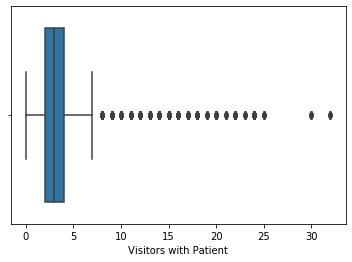

In [12]:
sns.boxplot(x=train_data["Visitors with Patient"])
    

In [13]:
q1 = train_data['Visitors with Patient'].quantile(.25)
q3 = train_data['Visitors with Patient'].quantile(.75)
iqr = q3-q1

In [14]:
maximum = q3+1.5*iqr
maximum

7.0

In [15]:
train_data["Visitors with Patient"] = np.where(train_data["Visitors with Patient"] >maximum,
                                               train_data['Visitors with Patient'].median(),
                                               train_data['Visitors with Patient'])

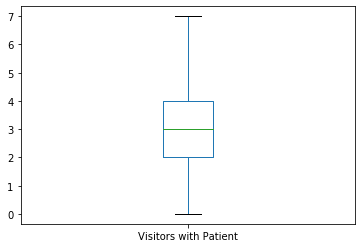

In [16]:
train_data['Visitors with Patient'].plot.box()

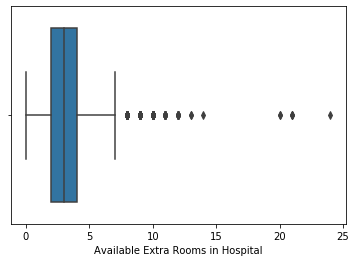

In [17]:
sns.boxplot(x=train_data['Available Extra Rooms in Hospital'])

In [18]:
q_25 = train_data['Available Extra Rooms in Hospital'].quantile(.25)
q_75 = train_data['Available Extra Rooms in Hospital'].quantile(.75)
iqr_ = q_75-q_25

In [19]:
maximum_ = q_75+1.5*iqr_
maximum_

7.0

In [20]:
train_data["Available Extra Rooms in Hospital"] = np.where(train_data["Available Extra Rooms in Hospital"] >maximum_,
                                               train_data['Available Extra Rooms in Hospital'].median(),
                                               train_data['Available Extra Rooms in Hospital'])

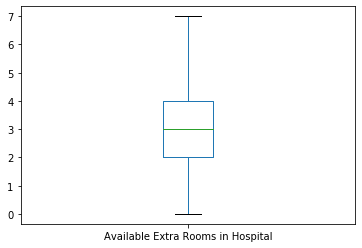

In [21]:
train_data["Available Extra Rooms in Hospital"].plot.box()

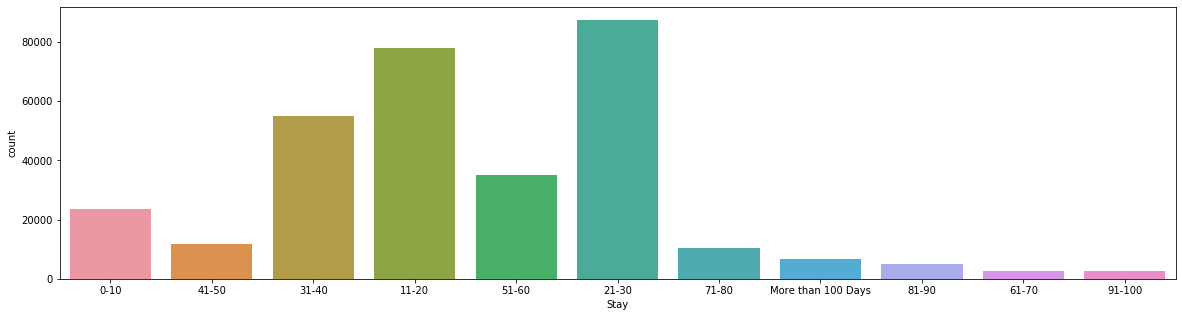

In [22]:
plt.figure(figsize=(20,5))
sns.countplot(x=train_data['Stay'])

In [23]:
pd.crosstab(index=train_data['Stay'],columns=train_data['Severity of Illness'])

Severity of Illness,Extreme,Minor,Moderate
Stay,,,
0-10,3399,7866,12339
11-20,10518,27081,40540
21-30,15502,21535,50454
31-40,10086,14447,30626
41-50,2351,3000,6392
51-60,7777,7128,20113
61-70,647,519,1578
71-80,2575,1928,5751
81-90,1113,985,2740


In [24]:
train_data.groupby(['Severity of Illness'])['Stay'].value_counts()

Severity of Illness  Stay              
Extreme              21-30                 15502
                     11-20                 10518
                     31-40                 10086
                     51-60                  7777
                     0-10                   3399
                     71-80                  2575
                     41-50                  2351
                     More than 100 Days     1950
                     81-90                  1113
                     91-100                  805
                     61-70                   647
Minor                11-20                 27081
                     21-30                 21535
                     31-40                 14447
                     0-10                   7866
                     51-60                  7128
                     41-50                  3000
                     71-80                  1928
                     81-90                   985
                     More tha

In [25]:
train_data.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay'],
      dtype='object')

In [26]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  float64
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [27]:
train_data['Hospital_code'] = train_data['Hospital_code'].astype('str')
train_data['City_Code_Hospital'] = train_data['City_Code_Hospital'].astype('str')
train_data['City_Code_Patient'] = train_data['City_Code_Patient'].astype('str')

In [28]:
train_data['Bed Grade'] = train_data['Bed Grade'].astype('str')

In [29]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  object 
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  object 
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  float64
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318438 non-null  object 
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3184

In [30]:
def split_mean(x):
    split_list = x.split('-')
    mean = (float(split_list[0])+float(split_list[1]))/2
    return mean

In [31]:
train_data['Age'] = train_data['Age'].apply(lambda x :split_mean(x))

In [32]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  object 
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  object 
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  float64
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318438 non-null  object 
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3184

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
le = LabelEncoder()

In [35]:
en_list = ['Hospital_code','Hospital_type_code','City_Code_Hospital',
           'Hospital_region_code','Department','Ward_Type','Ward_Facility_Code',
           'City_Code_Patient','Type of Admission','Severity of Illness','Bed Grade']

In [36]:
for col in en_list:
    train_data[col] = le.fit_transform(train_data[col])

In [37]:
train_data.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,30,2,5,2,3.0,3,2,5,1,31397,34,0,0,2.0,55.5,4911.0,0-10
1,2,11,2,7,2,2.0,3,3,5,1,31397,34,1,0,2.0,55.5,5954.0,41-50
2,3,1,4,0,0,2.0,1,3,4,1,31397,34,1,0,2.0,55.5,4745.0,31-40
3,4,18,1,4,1,2.0,3,2,3,1,31397,34,1,0,2.0,55.5,7272.0,41-50
4,5,18,1,4,1,2.0,3,3,3,1,31397,34,1,0,2.0,55.5,5558.0,41-50


In [38]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int32  
 2   Hospital_type_code                 318438 non-null  int32  
 3   City_Code_Hospital                 318438 non-null  int32  
 4   Hospital_region_code               318438 non-null  int32  
 5   Available Extra Rooms in Hospital  318438 non-null  float64
 6   Department                         318438 non-null  int32  
 7   Ward_Type                          318438 non-null  int32  
 8   Ward_Facility_Code                 318438 non-null  int32  
 9   Bed Grade                          318438 non-null  int32  
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3184

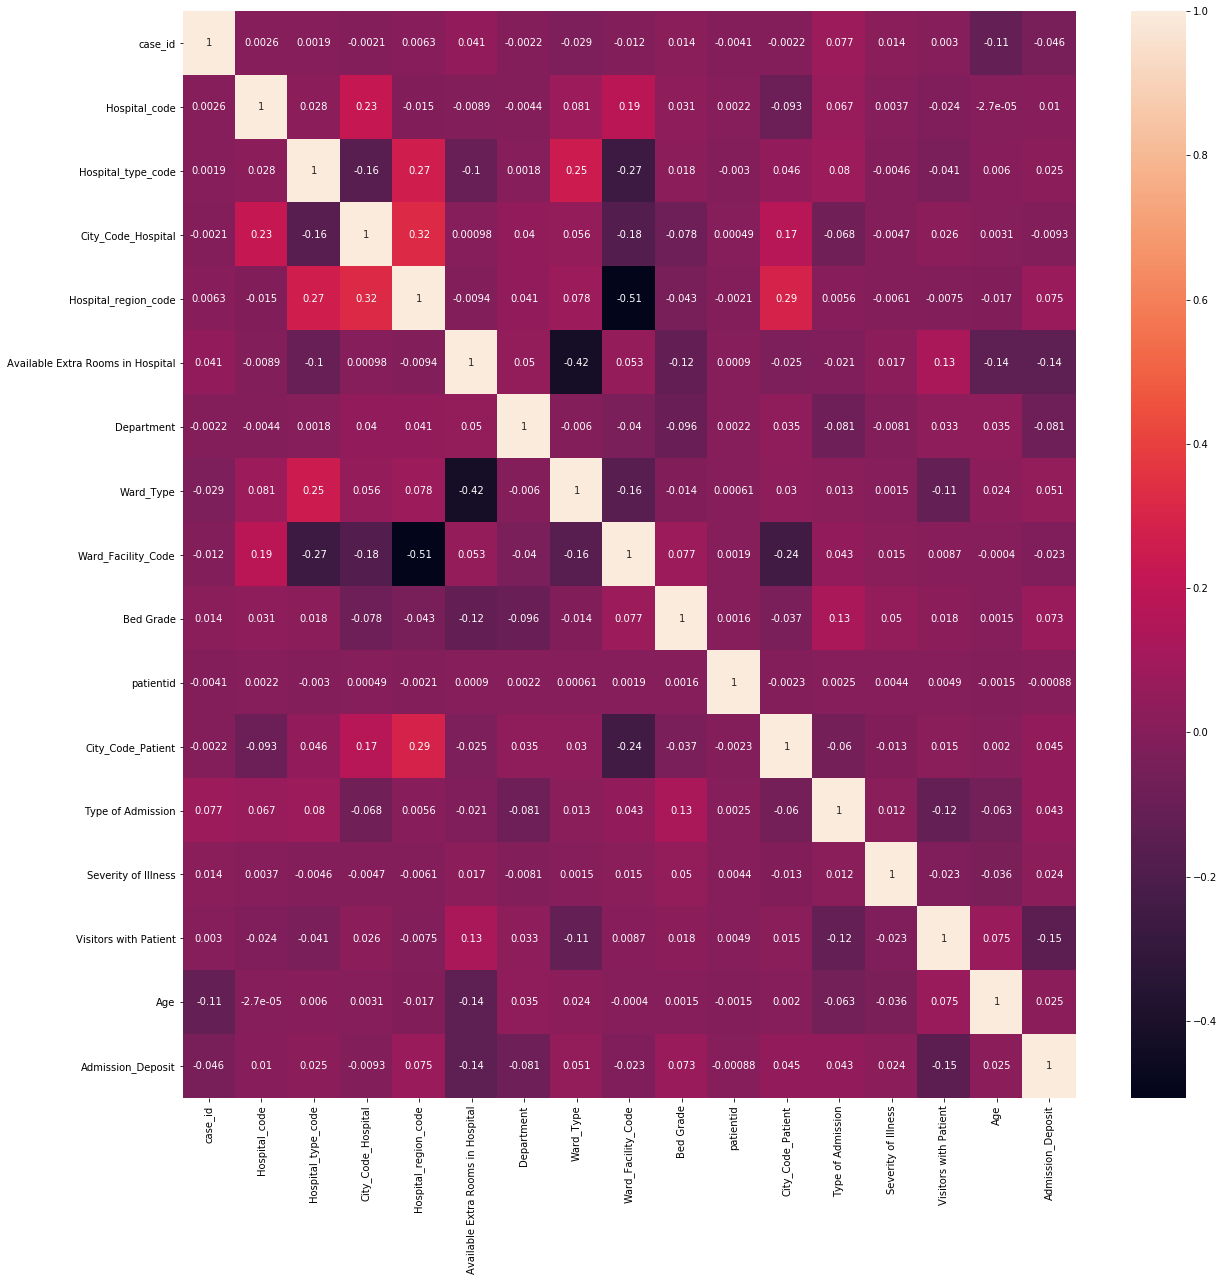

In [39]:
plt.figure(figsize=(20,20))
sns.heatmap(train_data.corr(),annot=True)

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
ss = StandardScaler()

In [42]:
for column in train_data.columns[~(train_data.columns.isin(['case_id', 'Stay']))].tolist():
    train_data[[column]] = ss.fit_transform(train_data[[column]])

In [43]:
train_data.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,1.717766,0.483919,-0.078246,1.623734,-0.156647,1.881928,0.138476,1.014833,-0.71688,-0.904442,0.69064,-1.136165,-1.788287,-0.885741,0.461593,0.027835,0-10
1,2,-0.477776,0.483919,0.529136,1.623734,-1.053375,1.881928,1.381246,1.014833,-0.71688,-0.904442,0.69064,0.315306,-1.788287,-0.885741,0.461593,0.987556,41-50
2,3,-1.633324,1.786248,-1.596703,-1.033982,-1.053375,-1.681582,1.381246,0.422433,-0.71688,-0.904442,0.69064,0.315306,-1.788287,-0.885741,0.461593,-0.124910,31-40
3,4,0.331108,-0.167246,-0.381938,0.294876,-1.053375,1.881928,0.138476,-0.169967,-0.71688,-0.904442,0.69064,0.315306,-1.788287,-0.885741,0.461593,2.200319,41-50
4,5,0.331108,-0.167246,-0.381938,0.294876,-1.053375,1.881928,1.381246,-0.169967,-0.71688,-0.904442,0.69064,0.315306,-1.788287,-0.885741,0.461593,0.623175,41-50


In [44]:
#X.head()

X = train_data[train_data.columns[~(train_data.columns.isin(['case_id', 'Stay']))].tolist()].values
y = train_data['Stay'].values

In [47]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [48]:
import xgboost as XGB

In [51]:
clf=XGB.XGBClassifier(learning_rate =0.1,
                      n_estimators=1000,
                      max_depth=5)
clf.fit(X_train,y_train)

In [ ]:
xgb_predict=clf.predict(X_test)

In [ ]:
accuracy_score(y_test,xgb_predict)

In [46]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score, RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score

In [145]:
#from sklearn.model_selection import train_test_split
kfold, scores = KFold(n_splits = 6, shuffle = True, random_state = 22), list()
for train, test in kfold.split(X):
    X_train, X_test = X[train], X[test]
    y_train, y_test = y[train], y[test]
    
    model = CatBoostClassifier(random_state = 22, max_depth = 6, n_estimators = 200, verbose = 100)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    score = accuracy_score(y_test, preds)
    scores.append(score)
    print('Validation Accuracy:', score)
print("Average Validation Accuracy: ", sum(scores)/len(scores))

Learning rate set to 0.409797
0:	learn: 1.8775728	total: 3.42s	remaining: 11m 20s
100:	learn: 1.5041964	total: 4m 33s	remaining: 4m 27s
199:	learn: 1.4652071	total: 8m 30s	remaining: 0us
Validation Accuracy: 0.4103781583856198
Learning rate set to 0.409797
0:	learn: 1.8790695	total: 2.41s	remaining: 7m 58s
100:	learn: 1.5059556	total: 3m 59s	remaining: 3m 54s
199:	learn: 1.4672667	total: 7m 54s	remaining: 0us
Validation Accuracy: 0.41476833794961654
Learning rate set to 0.409797
0:	learn: 1.8787525	total: 2.38s	remaining: 7m 53s
100:	learn: 1.5063298	total: 3m 58s	remaining: 3m 53s
199:	learn: 1.4669787	total: 7m 52s	remaining: 0us
Validation Accuracy: 0.41258266915380704
Learning rate set to 0.409797
0:	learn: 1.8776587	total: 2.38s	remaining: 7m 52s
100:	learn: 1.5046120	total: 3m 59s	remaining: 3m 54s
199:	learn: 1.4644818	total: 7m 54s	remaining: 0us
Validation Accuracy: 0.4121493037891206
Learning rate set to 0.409797
0:	learn: 1.8776342	total: 2.4s	remaining: 7m 57s
100:	learn: 1

# Test DataSet 

In [146]:
test = pd.read_csv("healthtest.csv")

In [147]:
test.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,318439,21,c,3,Z,3,gynecology,S,A,2.0,17006,2.0,Emergency,Moderate,2,71-80,3095.0
1,318440,29,a,4,X,2,gynecology,S,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4018.0
2,318441,26,b,2,Y,3,gynecology,Q,D,4.0,17006,2.0,Emergency,Moderate,3,71-80,4492.0
3,318442,6,a,6,X,3,gynecology,Q,F,2.0,17006,2.0,Trauma,Moderate,3,71-80,4173.0
4,318443,28,b,11,X,2,gynecology,R,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4161.0


In [149]:
submission_one_healthcare_updated = pd.DataFrame()

In [150]:
submission_one_healthcare_updated['case_id'] = test['case_id']

In [151]:
submission_one_healthcare_updated.head()

,case_id
0,318439
1,318440
2,318441
3,318442
4,318443


In [152]:
test.shape

(137057, 17)

In [153]:
test_1 = test.copy()

In [154]:
test_1.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                              35
patientid                               0
City_Code_Patient                    2157
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
dtype: int64

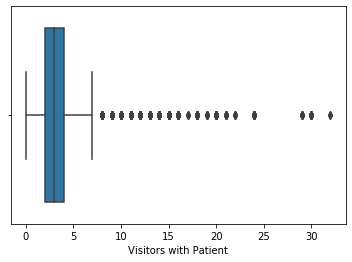

In [155]:
sns.boxplot(x=test_1["Visitors with Patient"])

In [156]:
q1_test = test_1['Visitors with Patient'].quantile(.25)
q3_test = test_1['Visitors with Patient'].quantile(.75)
iqr_test = q3_test-q1_test

In [157]:
maximum_test = q3_test+1.5*iqr_test
maximum_test

7.0

In [158]:
test_1["Visitors with Patient"] = np.where(test_1["Visitors with Patient"] >maximum_test,
                                               test_1['Visitors with Patient'].median(),
                                               test_1['Visitors with Patient'])

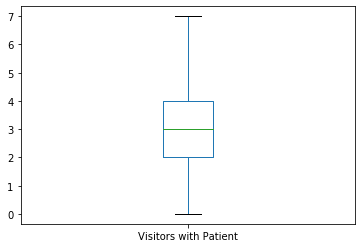

In [159]:
test_1["Visitors with Patient"].plot.box()

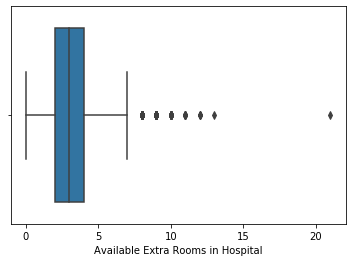

In [160]:
sns.boxplot(x=test_1["Available Extra Rooms in Hospital"])

In [161]:
q1_test_ = test_1['Available Extra Rooms in Hospital'].quantile(.25)
q3_test_ = test_1['Available Extra Rooms in Hospital'].quantile(.75)
iqr_test_ = q3_test_-q1_test_

In [162]:
maximum_test_ = q3_test_+1.5*iqr_test_
maximum_test_

7.0

In [163]:
test_1["Available Extra Rooms in Hospital"] = np.where(test_1["Available Extra Rooms in Hospital"] >maximum_test_,
                                               test_1['Available Extra Rooms in Hospital'].median(),
                                               test_1['Available Extra Rooms in Hospital'])

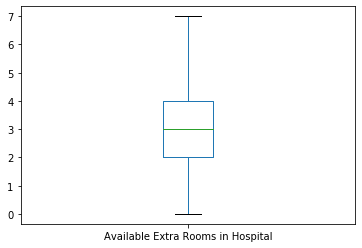

In [164]:
test_1["Available Extra Rooms in Hospital"].plot.box()

In [165]:
test_1['Hospital_code'] = test_1['Hospital_code'].astype('str')
test_1['City_Code_Hospital'] = test_1['City_Code_Hospital'].astype('str')
test_1['City_Code_Patient'] = test_1['City_Code_Patient'].astype('str')
test_1['Bed Grade'] = test_1['Bed Grade'].astype('str')

In [166]:
test_1['Age'] = test_1['Age'].apply(lambda x :split_mean(x))

In [167]:
test_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137057 entries, 0 to 137056
Data columns (total 17 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            137057 non-null  int64  
 1   Hospital_code                      137057 non-null  object 
 2   Hospital_type_code                 137057 non-null  object 
 3   City_Code_Hospital                 137057 non-null  object 
 4   Hospital_region_code               137057 non-null  object 
 5   Available Extra Rooms in Hospital  137057 non-null  float64
 6   Department                         137057 non-null  object 
 7   Ward_Type                          137057 non-null  object 
 8   Ward_Facility_Code                 137057 non-null  object 
 9   Bed Grade                          137057 non-null  object 
 10  patientid                          137057 non-null  int64  
 11  City_Code_Patient                  1370

In [168]:
for col in en_list:
    test_1[col] = le.fit_transform(test_1[col])

In [169]:
for column in test_1.columns[~(test_1.columns.isin(['case_id']))].tolist():
    test_1[[column]] = ss.fit_transform(test_1[[column]])

In [170]:
test_1.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,318439,-0.247961,0.487763,-0.074487,1.617060,-0.152627,0.098553,1.383073,-1.940856,-0.729991,-1.28804,-1.066536,-1.135402,0.814234,-0.888227,1.520188,-1.642110
1,318440,0.677873,-0.822919,0.230378,-1.032346,-1.051345,0.098553,1.383073,1.011415,-0.729991,-1.28804,-1.066536,0.314484,0.814234,0.760341,1.520188,-0.788083
2,318441,0.330685,-0.167578,-0.379352,0.292357,-0.152627,0.098553,-1.102126,-0.169493,1.568854,-1.28804,-1.066536,-1.135402,0.814234,-0.063943,1.520188,-0.349504
3,318442,1.487978,-0.822919,0.840107,-1.032346,-0.152627,0.098553,-1.102126,1.011415,-0.729991,-1.28804,-1.066536,0.314484,0.814234,-0.063943,1.520188,-0.644666
4,318443,0.562144,-0.167578,-0.989082,-1.032346,-1.051345,0.098553,0.140473,1.011415,-0.729991,-1.28804,-1.066536,0.314484,0.814234,0.760341,1.520188,-0.655769


In [173]:
predictions = model.predict(test_1[test_1.columns[~(test_1.columns.isin(['case_id']))].tolist()].values)

In [ ]:
predict_new = clf.predict(test_1[test_1.columns[~(test_1.columns.isin(['case_id']))].tolist()].values)

In [ ]:
#submission_one_healthcare_updated['Stay'] = predict_new

In [174]:
submission_one_healthcare_updated['Stay'] = predictions

In [175]:
submission_one_healthcare_updated.head()

,case_id,Stay
0,318439,0-10
1,318440,51-60
2,318441,21-30
3,318442,21-30
4,318443,51-60


In [176]:
submission_one_healthcare_updated.to_csv("submission_one_healthcare_updated.csv",index=False)

In [ ]:
import lightgbm as lgb
lgb_cl = lgb.LGBMClassifier(boosting_type='gbdt', learning_rate=0.1, n_estimators=500, importance_type='gain', objective='multiclass', num_boost_round=100,
                            num_leaves=300, max_depth=5, 
                            max_bin=60, bagging_faction=0.9, feature_fraction=0.9, subsample_freq=2, scale_pos_weight=2.5, 
                            random_state=1994, n_jobs=-1, silent=False)

In [ ]:
lgb_cl.fit(X, np.ravel(y))

In [ ]:
lgbm_pred = lgb_cl.predict(test_1[test_1.columns[~(test_1.columns.isin(['case_id']))].tolist()].values)

In [52]:
LGBM = pd.DataFrame()

In [54]:
LGBM['case_id'] = test['case_id']

In [ ]:
LGBM['Stay'] = lgbm_pred

In [ ]:
LGBM.to_csv("LGBM.csv",index=False)